In [1]:
# import packages for alpaca, panadas and OS/dotenv to read .env file with api keys
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()
import pathlib as Path
#!pip install pandas-datareader
import pandas_datareader as pdr
from datetime import datetime

%matplotlib inline

In [2]:
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 


start_date_covid = datetime(2017,11,1)
end_date_covid = datetime(2019,11,1)

# start and end date for 2008 recession 
start_date_2008 = datetime(2005,7,1)
end_date_2008 = datetime(2007,7,1)

# set entertainment tickers (per industry)
ent_tickers = ['IMAX','DIS','NFLX','CMCSA','SNE']
fast_food_tickers = ['MCD','WEN','YUM','DPZ','JACK']
tech_tickers = ['AMZN', 'AAPL', 'MSFT', 'GOOG', 'INTC']
tickers_travel_airline = ['EXPE','BKNG','AAL','AAP','LUV']
energy_tickers = ['XOM','BP','COP','CVX', 'TOT']

# get stock data from covid
entertainment_tickers_covid = pdr.DataReader(ent_tickers,'yahoo',start_date_covid,end_date_covid)
fastfood_tickers_covid = pdr.DataReader(fast_food_tickers,'yahoo',start_date_covid,end_date_covid)
covid_tech_ticker = pdr.DataReader(tech_tickers,'yahoo',start_date_covid,end_date_covid)
tra_air_covid_ticker = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_covid,end_date_covid)
energy_covid_ticker = pdr.DataReader(energy_tickers,'yahoo',start_date_covid,end_date_covid)

# get stock data from 2008 recession
entertainment_tickers_2008 = pdr.DataReader(ent_tickers,'yahoo',start_date_2008,end_date_2008)
fastfood_tickers_2008 = pdr.DataReader(fast_food_tickers,'yahoo',start_date_2008,end_date_2008)
tech_ticker2008 = pdr.DataReader(tech_tickers,'yahoo',start_date_2008,end_date_2008)
tra_air_ticker2008 = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_2008,end_date_2008)
energy_ticker2008 = pdr.DataReader(energy_tickers,'yahoo',start_date_2008,end_date_2008)


fastfood_tickers_covid
entertainment_tickers_2008

Attributes Adj Close                                             Close  \
Symbols         IMAX        DIS      NFLX      CMCSA        SNE   IMAX   
Date                                                                     
2005-07-01      9.93  20.371153  2.364286   8.012370  30.189739   9.93   
2005-07-05      9.72  20.330553  2.348572   8.015000  29.979908   9.72   
2005-07-06      9.90  20.127573  2.390000   7.915007  30.285908   9.90   
2005-07-07      9.84  19.851521  2.418571   7.917641  30.233459   9.84   
2005-07-08     10.03  20.298075  2.387143   8.070257  30.495743  10.03   
...              ...        ...       ...        ...        ...    ...   
2007-06-25      4.19  28.587107  2.802857  10.933132  45.921368   4.19   
2007-06-26      4.36  28.587107  2.788571  10.980498  45.320614   4.36   
2007-06-27      4.32  28.763359  2.968571  11.019965  45.196934   4.32   
2007-06-28      4.24  28.410845  2.835714  11.075227  44.596203   4.24   
2007-06-29      4.22  28.654243  2.770000  11.098908  45.382462   4.22   

Attributes                                             ...  Open             \
Symbols           DIS      NFLX      CMCSA        SNE  ...  IMAX        DIS   
Date                                                   ...                    
2005-07-01  24.751286  2.364286  10.150000  34.529999  ...  9.95  24.879530   
2005-07-05  24.701960  2.348572  10.153334  34.290001  ...  9.86  24.741421   
2005-07-06  24.455336  2.390000  10.026667  34.639999  ...  9.75  24.593445   
2005-07-07  24.119925  2.418571  10.030000  34.580002  ...  9.68  24.139654   
2005-07-08  24.662500  2.387143  10.223333  34.880001  ...  9.93  24.080465   
...               ...       ...        ...        ...  ...   ...        ...   
2007-06-25  34.060001  2.802857  13.850000  51.980000  ...  4.20  34.110001   
2007-06-26  34.060001  2.788571  13.910000  51.299999  ...  4.19  34.200001   
2007-06-27  34.270000  2.968571  13.960000  51.160000  ...  4.39  33.799999   
2007-06-28  33.849998  2.835714  14.030000  50.480000  ...  4.32  34.250000   
2007-06-29  34.139999  2.770000  14.060000  51.369999  ...  4.24  33.889999   

Attributes                                    Volume                          \
Symbols         NFLX      CMCSA        SNE      IMAX         DIS        NFLX   
Date                                                                           
2005-07-01  2.342857  10.383333  34.639999  263400.0   5244800.0   2040500.0   
2005-07-05  2.337143  10.156667  34.099998  523200.0   5697300.0   3780700.0   
2005-07-06  2.340000  10.110000  34.560001  544700.0   7361900.0   5493600.0   
2005-07-07  2.344286   9.980000  34.250000  355500.0  10409200.0   6248900.0   
2005-07-08  2.428571  10.026667  34.419998  489200.0  10447200.0   4733400.0   
...              ...        ...        ...       ...         ...         ...   
2007-06-25  2.821429  13.885000  52.290001  139400.0  10094000.0   6802600.0   
2007-06-26  2.851429  13.945000  51.959999  339100.0   9643600.0   5786200.0   
2007-06-27  2.791429  13.755000  50.959999  226600.0   8017900.0  21091700.0   
2007-06-28  2.955714  13.915000  50.669998  117300.0  11961500.0  14725200.0   
2007-06-29  2.867143  14.090000  51.200001  122900.0  12019300.0  12084100.0   

Attributes                         
Symbols          CMCSA        SNE  
Date                               
2005-07-01  29070600.0   417100.0  
2005-07-05  23263200.0   476800.0  
2005-07-06  27696600.0   473000.0  
2005-07-07  24835200.0   715000.0  
2005-07-08  26322600.0   431000.0  
...                ...        ...  
2007-06-25  25233800.0   520500.0  
2007-06-26  33242800.0   686700.0  
2007-06-27  34630400.0  2626100.0  
2007-06-28  28523000.0  1419600.0  
2007-06-29  29799800.0  2013300.0  

[502 rows x 30 columns]

In [3]:
tra_air_ticker2008.head()

Attributes Adj Close                                      Close             \
Symbols         EXPE       BKNG AAL        AAP        LUV  EXPE       BKNG   
Date                                                                         
2005-07-01       NaN  23.250000 NaN  41.303993  12.705664   NaN  23.250000   
2005-07-05       NaN  23.260000 NaN  41.266235  12.678062   NaN  23.260000   
2005-07-06       NaN  23.000000 NaN  40.517540  12.503257   NaN  23.000000   
2005-07-07       NaN  22.879999 NaN  40.190369  12.668862   NaN  22.879999   
2005-07-08       NaN  22.650000 NaN  40.435741  12.825268   NaN  22.650000   

Attributes                        ... Open                                   \
Symbols    AAL        AAP    LUV  ... EXPE       BKNG AAL        AAP    LUV   
Date                              ...                                         
2005-07-01 NaN  43.766666  13.81  ...  NaN  23.379999 NaN  43.160000  13.92   
2005-07-05 NaN  43.726665  13.78  ...  NaN  23.110001 NaN  43.766666  13.80   
2005-07-06 NaN  42.933334  13.59  ...  NaN  23.139999 NaN  43.733334  13.80   
2005-07-07 NaN  42.586666  13.77  ...  NaN  22.980000 NaN  42.933334  13.50   
2005-07-08 NaN  42.846668  13.94  ...  NaN  22.799999 NaN  42.626667  13.73   

Attributes Volume                                     
Symbols      EXPE      BKNG AAL       AAP        LUV  
Date                                                  
2005-07-01    NaN  372400.0 NaN  738900.0  2139900.0  
2005-07-05    NaN  262800.0 NaN  748900.0  1999700.0  
2005-07-06    NaN  487000.0 NaN  831900.0  2798700.0  
2005-07-07    NaN  525500.0 NaN  838300.0  3754000.0  
2005-07-08    NaN  485100.0 NaN  610600.0  2218600.0  

[5 rows x 30 columns]

In [4]:
# create new covid and 2008 dataframe to store ckosing prices of each stock

ent_closingprices_covid = pd.DataFrame()
covid_closingprices_ff= pd.DataFrame()
covid_tech_closingprices = pd.DataFrame()
covid_travel_closingprices = pd.DataFrame()
energy_covid_closingprices = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices_covid[ticker]=entertainment_tickers_covid['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    covid_closingprices_ff[ticker]=fastfood_tickers_covid['Adj Close'][ticker]
    
# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    covid_tech_closingprices[ticker]=covid_tech_ticker['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    covid_travel_closingprices[ticker]=tra_air_covid_ticker['Adj Close'][ticker]

# get closing prices for all tickers (Energy)
for ticker in energy_tickers:
    energy_covid_closingprices[ticker]=energy_covid_ticker['Adj Close'][ticker]

# drop time component on index
ent_closingprices_covid.index = ent_closingprices_covid.index.date
covid_closingprices_ff.index = covid_closingprices_ff.index.date
covid_tech_closingprices.index = covid_tech_closingprices.index.date
covid_travel_closingprices.index = covid_travel_closingprices.index.date
energy_covid_closingprices.index = energy_covid_closingprices.index.date


energy_covid_closingprices.head()

,XOM,BP,COP,CVX,TOT
2017-11-01,70.515472,33.086613,48.129959,100.545921,46.929188
2017-11-02,70.229614,33.013561,48.480999,100.051422,47.221355
2017-11-03,69.935326,32.924267,48.924419,99.756477,47.021023
2017-11-06,70.414566,33.614246,49.580315,101.534889,47.546906
2017-11-07,70.271652,33.671074,49.404804,101.708405,47.446735


In [5]:
ent_closingprices2008 = pd.DataFrame()
closingprices2008_ff = pd.DataFrame()
tech_closingprices2008 = pd.DataFrame()
travel_closingprices2008 = pd.DataFrame()
energy_closingprices2008 = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices2008[ticker]=entertainment_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    closingprices2008_ff[ticker]=fastfood_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    tech_closingprices2008[ticker]=tech_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    travel_closingprices2008[ticker]=tra_air_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (energy)
for ticker in energy_tickers:
    energy_closingprices2008[ticker]=energy_ticker2008['Adj Close'][ticker]
    
# drop time component on index
ent_closingprices2008.index = ent_closingprices2008.index.date
closingprices2008_ff.index = closingprices2008_ff.index.date
tech_closingprices2008.index = tech_closingprices2008.index.date
travel_closingprices2008.index = travel_closingprices2008.index.date
energy_closingprices2008.index = energy_closingprices2008.index.date


energy_closingprices2008.head()

,XOM,BP,COP,CVX,TOT
2005-07-01,35.786156,28.257227,27.351887,32.194221,25.454281
2005-07-05,36.909264,29.495125,28.342297,33.092747,25.626516
2005-07-06,36.277138,29.280619,27.759150,32.301590,25.818134
2005-07-07,36.528763,29.142075,28.050726,32.663265,25.848270
2005-07-08,36.455116,29.633667,27.879492,32.414619,26.332695


In [6]:
# calculate daily returns for each timeframe (entertainment)
ent_covid_dr = ent_closingprices_covid.pct_change().dropna()
ent_returns2008 = ent_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
ff_covid_dr = covid_closingprices_ff.pct_change().dropna()
ff_returns2008 = closingprices2008_ff.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
tech_covid_dr = covid_tech_closingprices.pct_change().dropna()
tech_returns2008 = tech_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Travel)
travel_covid_dr = covid_travel_closingprices.pct_change().dropna()
travel_returns2008 = travel_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Energy)
energy_covid_dr = energy_covid_closingprices.pct_change().dropna()
enerygy_returns2008 = energy_closingprices2008.pct_change().dropna()

In [7]:
# optimal weights for COVID by industry
# CODE FOR ALL WEIGHT OPTIMIZATION IN INDIVIDUAL INDUSTRY NOTEBOOKS
weights_array_covid_ent = np.array([1.99037306e-04, 7.48042464e-03, 4.68559570e-01, 2.29580098e-02,5.00802959e-01])
ff_covid_weights_array = np.array([0.0081001 , 0.02144947, 0.00317154, 0.44037344, 0.52690545])
tech_covid_weights_array = np.array([0.70613507, 0.00239445, 0.13786249, 0.14385094, 0.00975704])
ta_weights_array = np.array([0.61837201, 0.18266603, 0.02917101, 0.16262027, 0.00717068])
nrg_covid_weights_array = np.array([0.00387665, 0.01551683, 0.78027557, 0.14089321, 0.05943774])

# optimal weights for 2008 by industry
weights_array_2008_ent = np.array([0.29430474, 0.16388926, 0.53320127, 0.00709684, 0.00150789])
ff_2008_weights_array = np.array([0.51671353, 0.00217503, 0.42314488, 0.04618614, 0.01178043])
tech_2008_weights_array = np.array([0.86397001, 0.02692074, 0.06883576, 0.01831173, 0.02196176])
ta_weights_2008_array = np.array([0.00441766, 0.40000322, 0.07261973, 0.51761735, 0.00534204])
nrg_2008_weights_array = np.array([0.06440511, 0.00259053, 0.00214815, 0.53930083, 0.39155538])

In [8]:
# Expected returns, volatility and sharpe ratio of entertainment industry based on optimal weights

# COVID - ENTERTAINMENT
print(ent_closingprices_covid.columns)

#expect returns
print('Expected returns')
ent_covid_exp_return = np.sum((ent_covid_dr.mean()*weights_array_covid_ent)*252)
print(ent_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
ent_covid_exp_volat = np.sqrt(np.dot(weights_array_covid_ent.T, np.dot(ent_covid_dr.cov()*252, weights_array_covid_ent)))
print(ent_covid_exp_volat)

#Shape ratio
print('Shape ratio')
ent_covid_sharpe = ent_covid_exp_return/ent_covid_exp_volat
print(ent_covid_sharpe)

Index(['IMAX', 'DIS', 'NFLX', 'CMCSA', 'SNE'], dtype='object')
Expected returns
0.24185107864858246
Expected volatility
0.2829081522795821
Shape ratio
0.8548749009168698


In [9]:
# Expected returns, volatility and sharpe ratio of entertainment industry based on optimal weights

# 2008 - ENTERTAINMENT
print(energy_covid_closingprices.columns)

#expect returns
print('Expected returns')
ent_2008_exp_return = np.sum((ent_returns2008.mean()*weights_array_2008_ent)*252)
print(ent_2008_exp_return)

#expected STD/volatility
print('Expected volatility')
ent_2008_exp_volat = np.sqrt(np.dot(weights_array_2008_ent.T, np.dot(ent_returns2008.cov()*252, weights_array_2008_ent)))
print(ent_2008_exp_volat)

#Shape ratio
print('Shape ratio')
ent_2008_sharpe = ent_2008_exp_return/ent_2008_exp_volat
print(ent_2008_sharpe)

Index(['XOM', 'BP', 'COP', 'CVX', 'TOT'], dtype='object')
Expected returns
0.05538739701373837
Expected volatility
0.3009077772966005
Shape ratio
0.1840676818370959


In [10]:
# Expected returns, volatility and sharpe ratio of fast food industry based on optimal weights

#COVID - FAST FOOD

print(covid_closingprices_ff.columns)


#expect returns
print('Expected returns')
ff_covid_exp_return = np.sum((ff_covid_dr.mean()*ff_covid_weights_array)*252)
print(ff_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
ff_covid_exp_volat = np.sqrt(np.dot(ff_covid_weights_array.T, np.dot(ff_covid_dr.cov()*252, ff_covid_weights_array)))
print(ff_covid_exp_volat)

#Shape ratio
print('Shape ratio')
ff_covid_sharpe = ff_covid_exp_return/ff_covid_exp_volat
print(ff_covid_sharpe)

Index(['MCD', 'WEN', 'YUM', 'DPZ', 'JACK'], dtype='object')
Expected returns
0.09323830086018912
Expected volatility
0.21837576869469308
Shape ratio
0.4269626681454012


In [11]:
# Expected returns, volatility and sharpe ratio of fast food industry based on optimal weights

#2008 - FAST FOOD

print(closingprices2008_ff.columns)


#expect returns
print('Expected returns')
ff_2008_exp_return = np.sum((ff_returns2008.mean()*ff_2008_weights_array)*252)
print(ff_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
ff_2008_exp_volat = np.sqrt(np.dot(ff_2008_weights_array.T, np.dot(ff_returns2008.cov()*252, ff_2008_weights_array)))
print(ff_2008_exp_volat)

#Shape ratio
print('Shape ratio')
ff_2008_sharpe = ff_2008_exp_return/ff_2008_exp_volat
print(ff_2008_sharpe)

Index(['MCD', 'WEN', 'YUM', 'DPZ', 'JACK'], dtype='object')
Expected returns
0.09323830086018912
Expected volatility
0.17563181426901248
Shape ratio
1.4720199663838929


In [12]:
# Expected returns, volatility and sharpe ratio of tech industry based on optimal weights

#COVID - TECH
print('Tech Portfolio Analysis during COVID:')
print(covid_tech_closingprices.columns)

print("Weights")
print(tech_covid_weights_array)

#expect returns
print('Expected returns')
tech_covid_exp_return = np.sum((tech_covid_dr.mean()*tech_covid_weights_array)*252)
print(tech_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
tech_covid_exp_volat = np.sqrt(np.dot(tech_covid_weights_array.T, np.dot(tech_covid_dr.cov()*252, tech_covid_weights_array)))
print(tech_covid_exp_volat)

#Shape ratio
print('Sharpe ratio')
tech_covid_sharpe = tech_covid_exp_return/tech_covid_exp_volat
print(tech_covid_sharpe)

Tech Portfolio Analysis during COVID:
Index(['AMZN', 'AAPL', 'MSFT', 'GOOG', 'INTC'], dtype='object')
Weights
[0.70613507 0.00239445 0.13786249 0.14385094 0.00975704]
Expected returns
0.270804255479033
Expected volatility
0.2707612853436203
Sharpe ratio
1.0001587011797426


In [13]:
# Expected returns, volatility and sharpe ratio of tech industry based on optimal weights

#2008 - TECH

print('Tech Portfolio Analysis during 2008:')
print(tech_returns2008.columns)

print("Weights")
print(tech_2008_weights_array)

#expect returns
print('Expected returns')
tech_2008_exp_return = np.sum((tech_returns2008.mean()*tech_2008_weights_array)*252)
print(tech_2008_exp_return)

#expected STD/volatility
print('Expected volatility')
tech_2008_exp_volat = np.sqrt(np.dot(tech_2008_weights_array.T, np.dot(tech_returns2008.cov()*252, tech_2008_weights_array)))
print(tech_2008_exp_volat)

#Shape ratio
print('Sharpe ratio')
tech_2008_sharpe = tech_2008_exp_return/tech_2008_exp_volat
print(tech_2008_sharpe)

Tech Portfolio Analysis during 2008:
Index(['AMZN', 'AAPL', 'MSFT', 'GOOG', 'INTC'], dtype='object')
Weights
[0.86397001 0.02692074 0.06883576 0.01831173 0.02196176]
Expected returns
0.4282711541609953
Expected volatility
0.377074565204567
Sharpe ratio
1.1357731167273337


In [14]:
# Expected returns, volatility and sharpe ratio of airline industry based on optimal weights

#COVID - TRAVEL/AIRLINE
print(covid_travel_closingprices.columns)

#expect returns
print('Expected returns')
ta_covid_exp_return = np.sum((travel_covid_dr.mean()*ta_weights_array)*252)
print(ta_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
ta_covid_exp_volat = np.sqrt(np.dot(ta_weights_array.T, np.dot(travel_covid_dr.cov()*252, ta_weights_array)))
print(ta_covid_exp_volat)

#Shape ratio
print('Shape ratio')
ta_covid_sharpe = ta_covid_exp_return/ta_covid_exp_volat
print(ta_covid_sharpe)


Index(['EXPE', 'BKNG', 'AAL', 'AAP', 'LUV'], dtype='object')
Expected returns
0.1395667407473393
Expected volatility
0.21038892457332556
Shape ratio
0.6633749425279132


In [15]:
# Expected returns, volatility and sharpe ratio of airline industry based on optimal weights

#2008 - TRAVEL/AIRLINE
print(travel_closingprices2008.columns)

#expect returns
print('Expected returns')
ta_2008_exp_return = np.sum((travel_returns2008.mean()*ta_weights_2008_array)*252)
print(ta_2008_exp_return)

#expected STD/volatility
print('Expected volatility')
ta_2008_exp_volat = np.sqrt(np.dot(ta_weights_2008_array.T, np.dot(travel_returns2008.cov()*252, ta_weights_2008_array)))
print(ta_2008_exp_volat)

#Shape ratio
print('Shape ratio')
ta_2008_sharpe = ta_2008_exp_return/ta_2008_exp_volat
print(ta_2008_sharpe)

Index(['EXPE', 'BKNG', 'AAL', 'AAP', 'LUV'], dtype='object')
Expected returns
0.393041062867585
Expected volatility
0.23995940264378185
Shape ratio
1.637948163469351


In [16]:
# Expected returns, volatility and sharpe ratio of ENERGY industry based on optimal weights

#COVID - ENERGY
print(energy_covid_closingprices.columns)

#expect returns
print('Expected returns')
nrg_covid_exp_return = np.sum((energy_covid_dr.mean()*nrg_covid_weights_array)*252)
print(nrg_covid_exp_return)

#expected STD/volatility
print('Expected volatility')
nrg_covid_exp_volat = np.sqrt(np.dot(nrg_covid_weights_array.T, np.dot(energy_covid_dr.cov()*252, nrg_covid_weights_array)))
print(nrg_covid_exp_volat)

#Shape ratio
print('Shape ratio')
nrg_covid_sharpe = nrg_covid_exp_return/nrg_covid_exp_volat
print(nrg_covid_sharpe)

Index(['XOM', 'BP', 'COP', 'CVX', 'TOT'], dtype='object')
Expected returns
0.09552702384149238
Expected volatility
0.25474548354883336
Shape ratio
0.37499005874693103


In [17]:
# Expected returns, volatility and sharpe ratio of ENERGY industry based on optimal weights

#2008 - ENERGY
print(energy_closingprices2008.columns)

#expect returns
print('Expected returns')
nrg_2008_exp_return = np.sum((enerygy_returns2008.mean()*nrg_2008_weights_array)*252)
print(nrg_2008_exp_return)

#expected STD/volatility
print('Expected volatility')
nrg_2008_exp_volat = np.sqrt(np.dot(nrg_2008_weights_array.T, np.dot(enerygy_returns2008.cov()*252, nrg_2008_weights_array)))
print(nrg_2008_exp_volat)

#Shape ratio
print('Shape ratio')
nrg_2008_sharpe = nrg_2008_exp_return/nrg_2008_exp_volat
print(nrg_2008_sharpe)

Index(['XOM', 'BP', 'COP', 'CVX', 'TOT'], dtype='object')
Expected returns
0.23813939090111677
Expected volatility
0.18764436136093238
Shape ratio
1.2690996370685375


### SP500 DATA  & DAILY RETURNS - COVID

In [18]:
path_covid = "../data/SP500_COVID.csv"
covid_sp500_df = pd.read_csv(path_covid, index_col="Date", parse_dates=True, infer_datetime_format=True)


covid_sp500_df = covid_sp500_df[['Adj Close']]
covid_sp500_df.head()

,Adj Close
Date,
2017-11-02,2579.850098
2017-11-03,2587.840088
2017-11-06,2591.129883
2017-11-07,2590.639893
2017-11-08,2594.379883


In [19]:
covid_sp_returns = covid_sp500_df.pct_change().dropna()
covid_sp_returns.head()

,Adj Close
Date,
2017-11-03,0.003097
2017-11-06,0.001271
2017-11-07,-0.000189
2017-11-08,0.001444
2017-11-09,-0.003762


### SP500 DATA & RETURNS - 2008

In [20]:
# SP500 Data - 2008 Recesssion
path_2008 = "../data/SP500_2008.csv"
sp500_2008_df = pd.read_csv(path_2008, index_col="Date", parse_dates=True, infer_datetime_format=True)


sp500_2008_df = sp500_2008_df[['Adj Close']]
sp500_2008_df.head()

,Adj Close
Date,
2005-11-02,1214.760010
2005-11-03,1219.939941
2005-11-04,1220.140015
2005-11-07,1222.810059
2005-11-08,1218.589966


In [21]:
SP2008_returns = sp500_2008_df.pct_change().dropna()
SP2008_returns.head()

,Adj Close
Date,
2005-11-03,0.004264
2005-11-04,0.000164
2005-11-07,0.002188
2005-11-08,-0.003451
2005-11-09,0.001691


In [22]:
# Portfolio Variance COVID
ent_portfolio_variance_covid = np.dot(weights_array_covid_ent.T,np.dot(ent_covid_dr.cov()*252,weights_array_covid_ent))
ff_portfolio_variance_covid = np.dot(ff_covid_weights_array.T,np.dot(ff_covid_dr.cov()*252,ff_covid_weights_array))
tech_portfolio_variance_covid = np.dot(tech_covid_weights_array.T,np.dot(tech_covid_dr.cov()*252,tech_covid_weights_array))
ta_portfolio_variance_covid = np.dot(ta_weights_array.T,np.dot(travel_covid_dr.cov()*252,ta_weights_array))
nrg_portfolio_variance_covid = np.dot(nrg_covid_weights_array.T,np.dot(energy_covid_dr.cov()*252,nrg_covid_weights_array))

# Portfolio Variance 2008
ent_portfolio_variance_2008 = np.dot(weights_array_2008_ent.T,np.dot(ent_returns2008.cov()*252,weights_array_2008_ent))
ff_portfolio_variance_2008 = np.dot(ff_2008_weights_array.T,np.dot(ff_returns2008.cov()*252,ff_2008_weights_array))
tech_portfolio_variance_2008 = np.dot(tech_2008_weights_array.T,np.dot(tech_returns2008.cov()*252,tech_2008_weights_array))
ta_portfolio_variance_2008 = np.dot(ta_weights_2008_array.T,np.dot(travel_returns2008.cov()*252,ta_weights_2008_array))
nrg_portfolio_variance_2008 = np.dot(nrg_2008_weights_array.T,np.dot(enerygy_returns2008.cov()*252,nrg_2008_weights_array))


# Portfolio Volatility COVID
ent_portfolio_volatility_covid = np.sqrt(np.dot(weights_array_covid_ent.T,np.dot(ent_covid_dr.cov()*252,weights_array_covid_ent)))
ff_portfolio_volatility_covid = np.sqrt(np.dot(ff_covid_weights_array.T,np.dot(ff_covid_dr.cov()*252,ff_covid_weights_array)))
tech_portfolio_volatility_covid = np.sqrt(np.dot(tech_covid_weights_array.T,np.dot(tech_covid_dr.cov()*252,tech_covid_weights_array)))
ta_portfolio_volatility_covid = np.sqrt(np.dot(ta_weights_array.T,np.dot(travel_covid_dr.cov()*252,ta_weights_array)))
nrg_portfolio_volatility_covid = np.sqrt(np.dot(nrg_covid_weights_array.T,np.dot(energy_covid_dr.cov()*252,nrg_covid_weights_array)))

# Portfolio Volatility 2008
ent_portfolio_volatility_2008 = np.sqrt(np.dot(weights_array_2008_ent.T,np.dot(ent_returns2008.cov()*252,weights_array_2008_ent)))
ff_portfolio_volatility_2008 = np.sqrt(np.dot(ff_2008_weights_array.T,np.dot(ff_returns2008.cov()*252,ff_2008_weights_array)))
tech_portfolio_volatility_2008 = np.sqrt(np.dot(tech_2008_weights_array.T,np.dot(tech_returns2008.cov()*252,tech_2008_weights_array)))
ta_portfolio_volatility_2008 = np.sqrt(np.dot(ta_weights_2008_array.T,np.dot(travel_returns2008.cov()*252,ta_weights_2008_array)))
nrg_portfolio_volatility_2008 = np.sqrt(np.dot(nrg_2008_weights_array.T,np.dot(enerygy_returns2008.cov()*252,nrg_2008_weights_array)))

In [23]:
print(f"Entertainment Industry COVID Portfolio Variance: {round(ent_portfolio_variance_covid,3)}")

print(f"Entertainment Industry 2008 Portfolio Variance: {round(ent_portfolio_variance_2008,3)}")

print(f"Fast Food Industry 2008 Portfolio Variance: {round(ff_portfolio_variance_covid,3)}")

print(f"Fast Food Industry COVID Portfolio Variance: {round(ff_portfolio_variance_2008,3)}")

print(f"Technology Industry COVID Portfolio Variance: {round(tech_portfolio_variance_covid,3)}")

print(f"Technology Industry 2008 Portfolio Variance: {round(tech_portfolio_variance_2008,3)}")

print(f"Travel/Airlines Industry COVID Portfolio Variance: {round(ta_portfolio_variance_covid,3)}")

print(f"Travel/Airlines Industry 2008 Portfolio Variance: {round(ta_portfolio_variance_2008,3)}")

print(f"Energy Industry COVID Portfolio Variance: {round(nrg_portfolio_variance_covid,3)}")

print(f"Energy Industry 2008 Portfolio Variance: {round(nrg_portfolio_variance_2008,3)}")

Entertainment Industry COVID Portfolio Variance: 0.08
Entertainment Industry 2008 Portfolio Variance: 0.091
Fast Food Industry 2008 Portfolio Variance: 0.048
Fast Food Industry COVID Portfolio Variance: 0.031
Technology Industry COVID Portfolio Variance: 0.073
Technology Industry 2008 Portfolio Variance: 0.142
Travel/Airlines Industry COVID Portfolio Variance: 0.044
Travel/Airlines Industry 2008 Portfolio Variance: 0.058
Energy Industry COVID Portfolio Variance: 0.065
Energy Industry 2008 Portfolio Variance: 0.035


In [24]:
print(f"Entertainment Industry COVID Portfolio Volatility: {round(ent_portfolio_volatility_covid,3)}")

print(f"Entertainment Industry 2008 Portfolio Volatility: {round(ent_portfolio_volatility_2008,3)}")

print(f"Fast Food Industry 2008 Portfolio Volatility: {round(ff_portfolio_volatility_covid,3)}")

print(f"Fast Food Industry COVID Portfolio Volatility: {round(ff_portfolio_volatility_2008,3)}")

print(f"Technology Industry COVID Portfolio Volatility: {round(tech_portfolio_volatility_covid,3)}")

print(f"Technology Industry 2008 Portfolio Volatility: {round(tech_portfolio_volatility_2008,3)}")

print(f"Travel/Airlines Industry COVID Portfolio Volatility: {round(ta_portfolio_volatility_covid,3)}")

print(f"Travel/Airlines Industry 2008 Portfolio Volatility: {round(ta_portfolio_volatility_2008,3)}")

print(f"Energy Industry COVID Portfolio Volatility: {round(nrg_portfolio_volatility_covid,3)}")

print(f"Energy Industry 2008 Portfolio Volatility: {round(nrg_portfolio_volatility_2008,3)}")

Entertainment Industry COVID Portfolio Volatility: 0.283
Entertainment Industry 2008 Portfolio Volatility: 0.301
Fast Food Industry 2008 Portfolio Volatility: 0.218
Fast Food Industry COVID Portfolio Volatility: 0.176
Technology Industry COVID Portfolio Volatility: 0.271
Technology Industry 2008 Portfolio Volatility: 0.377
Travel/Airlines Industry COVID Portfolio Volatility: 0.21
Travel/Airlines Industry 2008 Portfolio Volatility: 0.24
Energy Industry COVID Portfolio Volatility: 0.255
Energy Industry 2008 Portfolio Volatility: 0.188


## Conclusions Based on Volatility and Variance
Need to add some in here

# EVERYTHING FROM HERE LOWER CONNOR ADDED ON 12.11 THIS WILL RELY ON DATA FROM THE ACTUAL RECESSIONS, UNLIKE EVERYTHING PRIOR THAT RELIED ON DATA LEADING UP TO THE RECESSIONS. IF YOU RUN CELLS BELOW THIS, THE STOCK DATA WILL BE OVERWRITTEN

In [25]:
#Pulling data 
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 


start_date_covid = datetime(2019,11,1)
end_date_covid = datetime(2020,11,1)

# start and end date for 2008 recession 
start_date_2008 = datetime(2007,7,1)
end_date_2008 = datetime(2009,7,1)

# set entertainment tickers (per industry)
ent_tickers = ['IMAX','DIS','NFLX','CMCSA','SNE']
fast_food_tickers = ['MCD','WEN','YUM','DPZ','JACK']
tech_tickers = ['AMZN', 'AAPL', 'MSFT', 'GOOG', 'INTC']
tickers_travel_airline = ['EXPE','BKNG','AAL','AAP','LUV']
energy_tickers = ['XOM','BP','COP','CVX', 'TOT']

# get stock data from covid
entertainment_tickers_covid = pdr.DataReader(ent_tickers,'yahoo',start_date_covid,end_date_covid)
fastfood_tickers_covid = pdr.DataReader(fast_food_tickers,'yahoo',start_date_covid,end_date_covid)
covid_tech_ticker = pdr.DataReader(tech_tickers,'yahoo',start_date_covid,end_date_covid)
tra_air_covid_ticker = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_covid,end_date_covid)
energy_covid_ticker = pdr.DataReader(energy_tickers,'yahoo',start_date_covid,end_date_covid)
sp500_covid_ticker = pdr.DataReader('^GSPC','yahoo',start_date_covid,end_date_covid)

# get stock data from 2008 recession
entertainment_tickers_2008 = pdr.DataReader(ent_tickers,'yahoo',start_date_2008,end_date_2008)
fastfood_tickers_2008 = pdr.DataReader(fast_food_tickers,'yahoo',start_date_2008,end_date_2008)
tech_ticker2008 = pdr.DataReader(tech_tickers,'yahoo',start_date_2008,end_date_2008)
tra_air_ticker2008 = pdr.DataReader(tickers_travel_airline,'yahoo',start_date_2008,end_date_2008)
energy_ticker2008 = pdr.DataReader(energy_tickers,'yahoo',start_date_2008,end_date_2008)
sp500_2008_ticker = pdr.DataReader('^GSPC','yahoo',start_date_2008,end_date_2008)

In [26]:
# create new covid and 2008 dataframe to store closing prices of each stock

ent_closingprices_covid = pd.DataFrame()
covid_closingprices_ff= pd.DataFrame()
covid_tech_closingprices = pd.DataFrame()
covid_travel_closingprices = pd.DataFrame()
energy_covid_closingprices = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices_covid[ticker]=entertainment_tickers_covid['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    covid_closingprices_ff[ticker]=fastfood_tickers_covid['Adj Close'][ticker]
    
# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    covid_tech_closingprices[ticker]=covid_tech_ticker['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    covid_travel_closingprices[ticker]=tra_air_covid_ticker['Adj Close'][ticker]

# get closing prices for all tickers (Energy)
for ticker in energy_tickers:
    energy_covid_closingprices[ticker]=energy_covid_ticker['Adj Close'][ticker]
    
# get closing prices for S&P500
sp500_covid_closingprices = sp500_covid_ticker['Adj Close']

# drop time component on index
ent_closingprices_covid.index = ent_closingprices_covid.index.date
covid_closingprices_ff.index = covid_closingprices_ff.index.date
covid_tech_closingprices.index = covid_tech_closingprices.index.date
covid_travel_closingprices.index = covid_travel_closingprices.index.date
energy_covid_closingprices.index = energy_covid_closingprices.index.date
sp500_covid_closingprices.index = sp500_covid_closingprices.index.date

In [27]:
#2008 CLOSING PRICES
ent_closingprices2008 = pd.DataFrame()
closingprices2008_ff = pd.DataFrame()
tech_closingprices2008 = pd.DataFrame()
travel_closingprices2008 = pd.DataFrame()
energy_closingprices2008 = pd.DataFrame()

# get closing prices for all tickers (entertainment)
for ticker in ent_tickers:
    ent_closingprices2008[ticker]=entertainment_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (fast food)
for ticker in fast_food_tickers:
    closingprices2008_ff[ticker]=fastfood_tickers_2008['Adj Close'][ticker]

# get closing prices for all tickers (tech)
for ticker in tech_tickers:
    tech_closingprices2008[ticker]=tech_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (travel)
for ticker in tickers_travel_airline:
    travel_closingprices2008[ticker]=tra_air_ticker2008['Adj Close'][ticker]
    
# get closing prices for all tickers (energy)
for ticker in energy_tickers:
    energy_closingprices2008[ticker]=energy_ticker2008['Adj Close'][ticker]
    
# get closing prices for S&P500
sp500_2008_closingprices = sp500_2008_ticker['Adj Close']
    
# drop time component on index
ent_closingprices2008.index = ent_closingprices2008.index.date
closingprices2008_ff.index = closingprices2008_ff.index.date
tech_closingprices2008.index = tech_closingprices2008.index.date
travel_closingprices2008.index = travel_closingprices2008.index.date
energy_closingprices2008.index = energy_closingprices2008.index.date
sp500_2008_closingprices.index = sp500_2008_closingprices.index.date

In [28]:
# calculate daily returns for each timeframe (entertainment)
ent_covid_dr = ent_closingprices_covid.pct_change().dropna()
ent_returns2008 = ent_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
ff_covid_dr = covid_closingprices_ff.pct_change().dropna()
ff_returns2008 = closingprices2008_ff.pct_change().dropna()

# calculate daily returns for each timeframe (fast food)
tech_covid_dr = covid_tech_closingprices.pct_change().dropna()
tech_returns2008 = tech_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Travel)
travel_covid_dr = covid_travel_closingprices.pct_change().dropna()
travel_returns2008 = travel_closingprices2008.pct_change().dropna()

# calculate daily returns for each timeframe (Energy)
energy_covid_dr = energy_covid_closingprices.pct_change().dropna()
enerygy_returns2008 = energy_closingprices2008.pct_change().dropna()

#calculate daily returns for each timeframe (S&P500)
sp500_covid_dr = sp500_covid_closingprices.pct_change().dropna()
sp500_2008_dr = sp500_2008_closingprices.pct_change().dropna()

In [29]:
#Calculate the weighted returns of each portfolio
#START WITH 2008
ent_2008_weight_ret = ent_returns2008.dot(weights_array_2008_ent)
ff_2008_weight_ret = ff_returns2008.dot(ff_covid_weights_array)
tech_2008_weight_ret = tech_returns2008.dot(tech_covid_weights_array)
trans_2008_weight_ret = travel_returns2008.dot(ta_weights_array)
nrg_2008_weight_ret = enerygy_returns2008.dot(nrg_2008_weights_array)

#NOW DO COVID
ent_covid_weight_ret = ent_covid_dr.dot(weights_array_covid_ent)
ff_covid_weight_ret = ff_covid_dr.dot(ff_covid_weights_array)
tech_covid_weight_ret = tech_covid_dr.dot(tech_covid_weights_array)
trans_covid_weight_ret = travel_covid_dr.dot(ta_weights_array)
nrg_covid_weight_ret = energy_covid_dr.dot(nrg_covid_weights_array)

In [30]:
#create weighted returns dataframes
#START WITH 2008
comb_2008_df = pd.DataFrame([ent_2008_weight_ret,ff_2008_weight_ret,tech_2008_weight_ret,trans_2008_weight_ret,nrg_2008_weight_ret,sp500_2008_dr])
comb_2008_df = comb_2008_df.transpose()
comb_2008_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

#NOW DO COVID
comb_covid_df = pd.DataFrame([ent_covid_weight_ret,ff_covid_weight_ret,tech_covid_weight_ret,trans_covid_weight_ret,nrg_covid_weight_ret,sp500_covid_dr])
comb_covid_df = comb_covid_df.transpose()
comb_covid_df.columns = ['Entertainment', 'Fast_Food', 'Tech', 'Transportation', 'Energy', 'S&P_500']

# The above dataframes should be exported as csvs so that the below can be done in the pyviz environment

# Time for some usable data and charts

In [31]:
#TIME TO CALCULATE THE ANNUAL RISK DURING 2008
annual_risk_2008 = comb_2008_df.std() * np.sqrt(252)
annual_risk_2008 = annual_risk_2008.sort_values()
annual_risk_2008

S&P_500           0.351733
Energy            0.434159
Entertainment     0.453281
Tech              0.509049
Transportation    0.521757
Fast_Food         0.551031
dtype: float64

### In 2008, Fast Food has the highest annual risk, Energy is the most risk averse. Each industry is considered riskier than the S&P500

In [32]:
#NOW DO COVID
annual_risk_covid = comb_covid_df.std() * np.sqrt(252)
annual_risk_covid = annual_risk_covid.sort_values()
annual_risk_covid

Entertainment     0.330626
S&P_500           0.342256
Tech              0.355984
Fast_Food         0.551722
Transportation    0.581806
Energy            0.641585
dtype: float64

### During COVID times, Energy has the highest annual risk, whereas Entertainment is the most risk averse. Only Entertainment is less risky than S&P500.

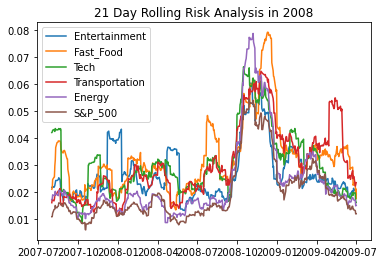

In [38]:
#Rolling 21 day risk for 2008
rolling_2008_risk21 = comb_2008_df.rolling(window=21).std()
rolling_2008_risk21.plot(title = '21 Day Rolling Risk Analysis in 2008')

### It would appear that each of these portfolios were very responsive to the S&P 500 during 2008. Especially between October of 2008 and January of 2009. Transportation, Fast Food and Entertainment all had various spikes that appear to be independent of the S&P500 though.

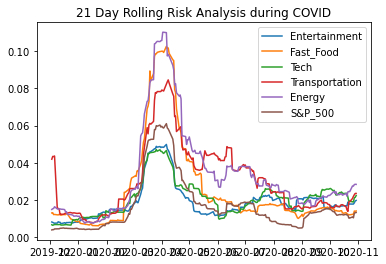

In [50]:
#Rolling 21 day risk for covid
rolling_covid_risk21 = comb_covid_df.rolling(window=21).std()
rolling_covid_risk21.plot(title = '21 Day Rolling Risk Analysis during COVID')

### Each of these industries appear to be heavily influenced by the S&P 500 during COVID. Energy, Fast Food, and Transportation all seemed to respond extremely heavily from March to May.

In [42]:
#Calculate Sharpe Ratios
#2008
sharpe_2008_rats = (comb_2008_df.mean() * 252) / (comb_2008_df.std() * np.sqrt(252))
sharpe_2008_rats = sharpe_2008_rats.sort_values()

#covid
sharpe_covid_rats = (comb_covid_df.mean() * 252) / (comb_covid_df.std() * np.sqrt(252))
sharpe_covid_rats = sharpe_covid_rats.sort_values()

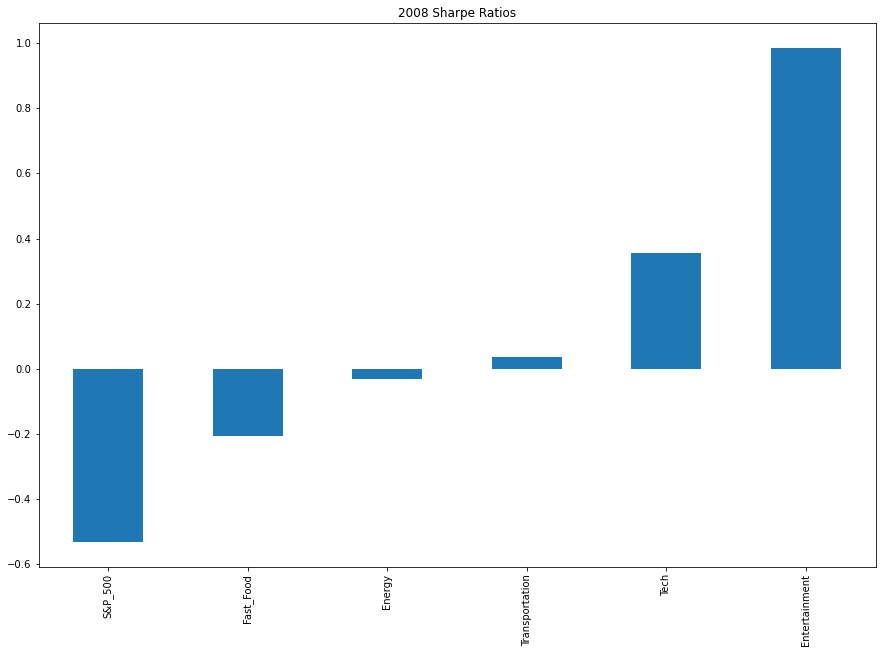

In [43]:
sharpe_2008_rats.plot(kind = 'bar', figsize = (15,10) , title = '2008 Sharpe Ratios')

### Every single portfolio has a better sharpe ratio than the S&P 500 during 2008. This means, the average of the returns weighted against the annualized risk were all higher for the portfolios than the S&P 500.

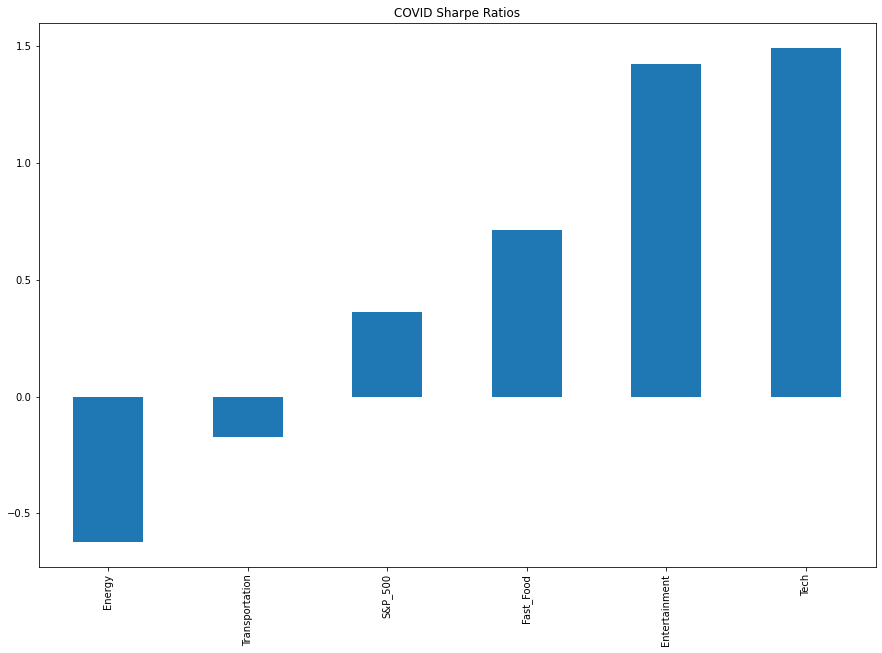

In [44]:
sharpe_covid_rats.plot(kind = 'bar', figsize = (15,10) , title = 'COVID Sharpe Ratios')

### Energy and Transportation have worse sharpe ratios than the S&P 500. Fast Food, Entertainment and Tech have better average returns weighted against their risk than the S&P 500.

In [46]:
#2008 CORRELATION ANALYSIS
correlation_2008 = rolling_2008_risk21.corr()
correlation_2008.style.background_gradient()

,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
Entertainment,1.000000,0.574385,0.731311,0.584855,0.771065,0.758989
Fast_Food,0.574385,1.000000,0.750585,0.827493,0.807433,0.830994
Tech,0.731311,0.750585,1.000000,0.689691,0.859277,0.864128
Transportation,0.584855,0.827493,0.689691,1.000000,0.820419,0.868746
Energy,0.771065,0.807433,0.859277,0.820419,1.000000,0.974888
S&P_500,0.758989,0.830994,0.864128,0.868746,0.974888,1.000000


### Energy is most responsive to the S&P 500, Entertainment is least.  Energy and transportation are fairly correlated. As are tech and energy.

In [47]:
#COVID CORRELATION ANALYSIS
correlation_covid = rolling_covid_risk21.corr()
correlation_covid.style.background_gradient()

,Entertainment,Fast_Food,Tech,Transportation,Energy,S&P_500
Entertainment,1.000000,0.886242,0.919438,0.740330,0.872648,0.908004
Fast_Food,0.886242,1.000000,0.855338,0.882344,0.961199,0.967693
Tech,0.919438,0.855338,1.000000,0.715954,0.855322,0.884819
Transportation,0.740330,0.882344,0.715954,1.000000,0.931505,0.892052
Energy,0.872648,0.961199,0.855322,0.931505,1.000000,0.970405
S&P_500,0.908004,0.967693,0.884819,0.892052,0.970405,1.000000


### Again, energy is most heavily correlated to the S&P 500, followed closely by Fast Food. Tech is the least correlated to the S&P500, but I wouldn't call it un-correlated.

# I Will pick up here with calculating and plotting betas, but it is dinner time on Friday and I am very hungry. I feel like this has given us a good starting point for Saturday.

# Should we drop this stuff guys?

In [34]:
# nrg weights array - covid

# number_ports = 100000
# nrg_covid_all_weights = np.zeros((number_ports, len(energy_covid_closingprices.columns)))
# nrg_covid_returns_array = np.zeros(number_ports)
# nrg_covid_volat_array = np.zeros(number_ports)
# nrg_covid_sharpe_array = np.zeros(number_ports)
                                 
# for index in range(number_ports):
#     weights = np.array(np.random.random(5))
#     weights = weights/np.sum(weights)
    
#     nrg_covid_all_weights[index,:] = weights
    
#     nrg_covid_returns_array[index]= np.sum((energy_covid_dr.mean()*weights)*252)
    
#     nrg_covid_volat_array[index]=np.sqrt(np.dot(weights.T, np.dot(energy_covid_dr.cov()*252, weights)))
    
#     nrg_covid_sharpe_array[index]=nrg_covid_returns_array[index]/nrg_covid_volat_array[index]
    

In [35]:
# find shape weights by index - energy covid
# nrg_covid_sharpe_array.max()

# nrg_covid_max_shape = nrg_covid_sharpe_array.argmax()
# nrg_covid_max_shape

# nrg_covid_weights_array = nrg_covid_all_weights[nrg_covid_max_shape,:]
# nrg_covid_weights_array

In [36]:
# nrg weights array - 2008

# number_ports = 100000
# nrg_2008_all_weights = np.zeros((number_ports, len(energy_closingprices2008.columns)))
# nrg_2008_returns_array = np.zeros(number_ports)
# nrg_2008_volat_array = np.zeros(number_ports)
# nrg_2008_sharpe_array = np.zeros(number_ports)
                                 
# for index in range(number_ports):
#     weights = np.array(np.random.random(5))
#     weights = weights/np.sum(weights)
    
#     nrg_2008_all_weights[index,:] = weights
    
#     nrg_2008_returns_array[index]= np.sum((enerygy_returns2008.mean()*weights)*252)
    
#     nrg_2008_volat_array[index]=np.sqrt(np.dot(weights.T, np.dot(enerygy_returns2008.cov()*252, weights)))
    
#     nrg_2008_sharpe_array[index]=nrg_2008_returns_array[index]/nrg_2008_volat_array[index]

In [37]:
# find shape weights by index - energy 2008
# nrg_2008_sharpe_array.max()

# nrg_2008_max_shape = nrg_2008_sharpe_array.argmax()
# nrg_2008_max_shape

# nrg_2008_weights_array = nrg_2008_all_weights[nrg_2008_max_shape,:]
# nrg_2008_weights_array

## volatility for 2008 & COVID
* standard deviation
* box & whisker plot?

## Industries
* Tech: AMD, AAPL, MSFT, GOOG, INTC
* Entertainment: IMAX, DIS, NFLX, CNK, SNE
* Fast Food/Restaurants: MCD, WEN, YUM, DPZ, CMG
* Energy: XOM, BP, RDS, COP, CVX
* Travel/Airlines: EXPE, BKNG, DAL, AAP, UAL